# 딥러닝분석_(4)CNN-품종 분류 

In [1]:
import os, glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils import np_utils

# 1. 데이터 수집

### - 제공하는 이미지 파일 다운로드 : 14장_data 폴더로 이동

# 2. 데이터 준비 및 탐색

## 1) 데이터(이미지 파일) 로딩

In [2]:
root_dir = "./14장_data/dog/"

In [3]:
categories = ["말티즈", "요크셔", "푸들"]
num_class = len(categories)

### - 이미지 크기 설정 및 저장할 리스트 준비

In [4]:
image_width = 64
image_height = 64

### - 학습할 카테고리별 이미지 파일을 로딩하여 리스트에 저장

In [5]:
X = [] # 이미지 저장 리스트
Y = [] # 이미지의 카테고리 인덱스 저장 리스트

for idx, category in enumerate(categories):
    image_dir = root_dir + category
    files = glob.glob(image_dir + "/*.*")        

    for i, f in enumerate(files):                
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_width, image_height))
        data = np.asarray(img)  #규격에 맞게 조정한 img 객체를 numpy배열로 변환하여 data 변수에 저장              
        X.append(data)
        Y.append(idx)
    print(f"{image_dir} : {i+1}") #작업 확인용 출력 : 카테고리 폴더 위치와 개수 출력
#작업 확인용 출력    
print(f"image shape : {data.shape}") #(가로크기, 세로크기, 색상채널수) => (image_width, image_height, 3)
print("X 데이터 총 개수 :", len(X)) #이미지 파일의 총 개수
print("Y 데이터 총 개수 :", len(Y))  #이미지 파일의 총 개수

./14장_data/dog/말티즈 : 10
./14장_data/dog/요크셔 : 6
./14장_data/dog/푸들 : 5
image shape : (64, 64, 3)
X 데이터 총 개수 : 21
Y 데이터 총 개수 : 21


## 2) 데이터 형태를 배열로 변환하기

In [6]:
#데이터프레임 X, Y를 배열 형식으로 변환
np_x = np.array(X)
np_y = np.array(Y)

print(np_x.shape) #작업 확인용 출력 => (이미지 총 갯수, 가로크기, 세로크기, 색상채널수)
print(np_y.shape) #작업 확인용 출력 => (이미지 총 갯수, )

(21, 64, 64, 3)
(21,)


### - 학습/평가 데이터 분할

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(np_x, np_y, test_size=0.2, random_state=42)

In [8]:
X_train = X_train.astype("float") / 255
X_test = X_test.astype("float") / 255

In [9]:
Y_train = np_utils.to_categorical(Y_train, num_class)
Y_test = np_utils.to_categorical(Y_test, num_class)

print(Y_train[0]) #작업 확인용 출력

[1. 0. 0.]


# 3. CNN 모델 구축 - 품종 분류 모델 구축 및 학습

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

## 1) CNN 모델 구축

In [11]:
# 입력 이미지의 크기 및 색상채널 수 설정
input_shape = (image_width, image_height, 3)  # 가로 64, 세로 64, 3개의 채널(RGB)

In [12]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dense(num_class, activation='softmax'))

In [13]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# 모델 최적화 설정
MODEL_DIR = root_dir+'model/'
if not os.path.exists(MODEL_DIR): 
    os.mkdir(MODEL_DIR)

modelpath = MODEL_DIR+"{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

## 2) 모델 학습 수행 

In [15]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), \
                    epochs=30, batch_size=20, verbose=0,\
                   callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.93943, saving model to ./14장_data/dog/model\01-0.9394.hdf5

Epoch 2: val_loss did not improve from 0.93943

Epoch 3: val_loss did not improve from 0.93943

Epoch 4: val_loss improved from 0.93943 to 0.93264, saving model to ./14장_data/dog/model\04-0.9326.hdf5


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: val_loss improved from 0.93264 to 0.77981, saving model to ./14장_data/dog/model\05-0.7798.hdf5

Epoch 6: val_loss improved from 0.77981 to 0.72184, saving model to ./14장_data/dog/model\06-0.7218.hdf5

Epoch 7: val_loss improved from 0.72184 to 0.70431, saving model to ./14장_data/dog/model\07-0.7043.hdf5

Epoch 8: val_loss improved from 0.70431 to 0.65872, saving model to ./14장_data/dog/model\08-0.6587.hdf5

Epoch 9: val_loss improved from 0.65872 to 0.58334, saving model to ./14장_data/dog/model\09-0.5833.hdf5

Epoch 10: val_loss improved from 0.58334 to 0.55708, saving model to ./14장_data/dog/model\10-0.5571.hdf5

Epoch 11: val_loss improved from 0.55708 to 0.53299, saving model to ./14장_data/dog/model\11-0.5330.hdf5

Epoch 12: val_loss improved from 0.53299 to 0.51020, saving model to ./14장_data/dog/model\12-0.5102.hdf5

Epoch 13: val_loss improved from 0.51020 to 0.49822, saving model to ./14장_data/dog/model\13-0.4982.hdf5

Epoch 14: val_loss did not improve from 0.49822

E

## 3) 모델 평가

In [16]:
score = model.evaluate(X_test, Y_test)
print('loss =', score[0])
print('accuracy =', score[1])

1/1 [==============================] - 0s 17ms/step - loss: 0.6221 - accuracy: 0.8000
loss = 0.6221494078636169
accuracy = 0.800000011920929


# =================================

# <<  새 데이터로 품종 예측하기 >>

### 1) 예측에 사용할 새 이미지 준비:  웹브라우저에서 강아지 이미지를 다운로드 받아 new 폴더에 저장하기

In [17]:
new_files = glob.glob(root_dir+"new/*.*")

new_files  #작업 확인용 출력

['./14장_data/dog/new\\new1.jpg',
 './14장_data/dog/new\\new2.jpg',
 './14장_data/dog/new\\new3.jpg']

### 2) 새 이미지 데이터를 CNN 모델 입력 형태로 구성하기

In [18]:
image_size = 64
new_img = []
new_X = []

# 이미지 불러오기
for i,fname in enumerate(new_files):
    img = Image.open(fname)
    img = img.convert("RGB")
    img = img.resize((image_size, image_size))
    new_img.append(img) #이미지 데이터 추가
    new_data = np.asarray(img)
    new_data = new_data.astype("float") / 255
    new_X.append(new_data) #이미지 데이터를 정규화 상태로 추가

new_X = np.array(new_X)

### 3) CNN 모델을 사용하여 새 이미지 데이터에 대한 예측 수행

In [19]:
new_Predict = model.predict(new_X)

1/1 [==============================] - 0s 53ms/step


### 4) 예측 결과 출력하여 확인하기

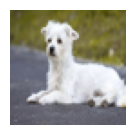

입력:./14장_data/dog/new\new1.jpg => 예측: 말티즈 / Score=99.23%




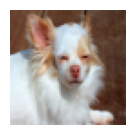

입력:./14장_data/dog/new\new2.jpg => 예측: 말티즈 / Score=99.42%




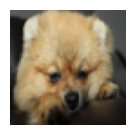

입력:./14장_data/dog/new\new3.jpg => 예측: 요크셔(59.75%) 와 말티즈(32.77%)의 믹스견으로 추정됩니다.




In [20]:
for i, c in enumerate(new_Predict):
    # 입력 이미지 출력하기
    plt.figure(figsize=(1.5,1.5))
    plt.imshow(new_img[i])
    plt.axis('off')
    plt.show()
    # 품종 예측 출력하기
    top_1 = c.argmax() #첫번째 예측 카테고리의 인덱스
    if c[top_1] > 0.78:                
        print(f"입력:{new_files[i]} => 예측: {categories[top_1]} / Score={c[top_1]*100:.2f}%\n\n")
    else :               
        top_2 = np.argsort(c)[-2]  # 두번째 예측 카테고리의 인덱스
        print(f"입력:{new_files[i]} => 예측: {categories[top_1]}({c[top_1]*100:.2f}%) 와 {categories[top_2]}({c[top_2]*100:.2f}%)의 믹스견으로 추정됩니다.\n\n")